In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [3]:
df = pd.read_csv('../data/processed/merged_data.csv')

In [4]:
df['transaction_date'] = pd.to_datetime(df['transaction_date'])

In [5]:
snapshot_date = df['transaction_date'].max() + pd.Timedelta(days=1)

rfm = df.groupby('customer_id').agg({
    'transaction_date': lambda x: (snapshot_date - x.max()).days,
    'customer_id': 'count',
    'transaction_amount': 'sum'
})
rfm.columns = ['Recency','Frequency','Monetary']
rfm['Frequency'] = rfm['Frequency'].astype(int)


In [6]:
rfm['R_score'] = pd.qcut(rfm['Recency'], 4, labels=[4,3,2,1])
rfm['F_score'] = pd.qcut(rfm['Frequency'], 4, labels=[1,2,3,4])
rfm['M_score'] = pd.qcut(rfm['Monetary'], 4, labels=[1,2,3,4])

rfm['RFM_Segment'] = rfm['R_score'].astype(str) + rfm['F_score'].astype(str) + rfm['M_score'].astype(str)
rfm['RFM_Score'] = rfm[['R_score','F_score','M_score']].sum(axis=1)

print("Sample RFM data:\n", rfm.head())

Sample RFM data:
              Recency  Frequency  Monetary R_score F_score M_score RFM_Segment  \
customer_id                                                                     
100019            80         11  26871.44       2       3       3         233   
100097            32          7  12770.32       3       1       1         311   
100193            11         10  34422.99       4       2       4         424   
100255            43         14  40696.74       3       4       4         344   
100278             1         14  23896.12       4       4       2         442   

             RFM_Score  
customer_id             
100019               8  
100097               5  
100193              10  
100255              11  
100278              10  


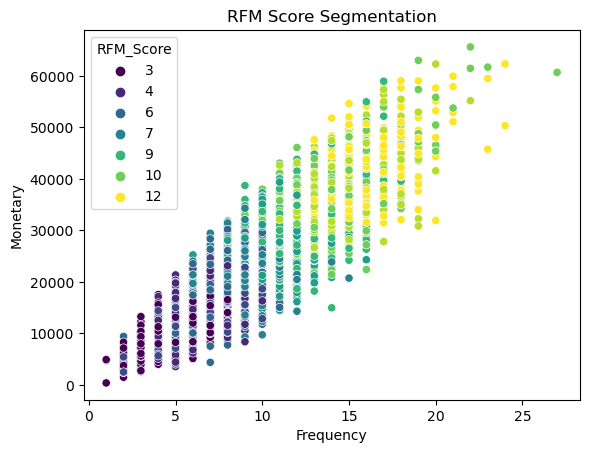

In [7]:
sns.scatterplot(data=rfm, x='Frequency', y='Monetary', hue='RFM_Score', palette='viridis')
plt.title("RFM Score Segmentation")
plt.show()

In [8]:
rfm.to_csv('../data/processed/rfm_scores.csv', index=True)

print("\nRFM analysis complete. Results saved to '../data/processed/rfm_scores.csv'")


RFM analysis complete. Results saved to '../data/processed/rfm_scores.csv'
